General text about what we did in this file

# Imports

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import the data from the dataframe

In [72]:
start_df: pd.DataFrame = pd.read_csv('Datasets/i4talent.csv')
start_df.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


# Pre-data cleaning steps
##### Transforming the data to the correct types 
##### Looking for outliers and missing values

In [73]:
# Changing the column names to make it more consistent and easier to work with
new_column_name: dict[str, str] = {
    'WerknemerID': 'werknemer_id',
    'datum': 'datum',
    'geboortedatum': 'geboortedatum',
    'indiensttreding_datum': 'startdatum',
    'uitdiensttreding_datum': 'einddatum',
    'leeftijd': 'leeftijd',
    'lengte_dienst': 'dienstperiode',
    'stad': 'stad',
    'afdeling': 'afdeling',
    'klant_id': 'klant_id',
    'geslacht_id': 'geslacht_id',
    'geslacht': 'geslacht',
    'uitdiensttreding_reden': 'uitdienst_reden',
    'STATUS_JAAR': 'status_jaar',
    'STATUS': 'status',
    'BUSINESS_UNIT': 'business_unit',
}

# Hernoem de specifieke kolommen
start_df = start_df.rename(columns=new_column_name)

# Check if the renaming all the columns
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49753 entries, 0 to 49752
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   werknemer_id           49753 non-null  int64  
 1   datum                  49753 non-null  object 
 2   geboortedatum          49753 non-null  object 
 3   startdatum             49753 non-null  object 
 4   einddatum              49753 non-null  object 
 5   leeftijd               44653 non-null  float64
 6   dienstperiode          44802 non-null  float64
 7   stad                   44210 non-null  object 
 8   afdeling               44688 non-null  object 
 9   klant_id               49753 non-null  int64  
 10  geslacht_id            49753 non-null  object 
 11  geslacht               49753 non-null  object 
 12  uitdienst_reden        49753 non-null  object 
 13  uitdiensttreding_type  49753 non-null  object 
 14  status_jaar            49753 non-null  int64  
 15  st

In [74]:
# Change the date columns to ah pd datetime time
start_df['einddatum'] = pd.to_datetime(start_df['einddatum'])
start_df['startdatum'] = pd.to_datetime(start_df['startdatum'])
start_df['datum'] = pd.to_datetime(start_df['datum'])
start_df['geboortedatum'] = pd.to_datetime(start_df['geboortedatum'])
start_df['geboortedatum'] = start_df['geboortedatum'].dt.strftime('%d/%m/%Y')

# Change the weird value to Beëindigd
start_df = start_df.replace('BeÌÇindigd', 'Beëindigd', regex=True)

In [75]:
# Check  for missing data 
missing_data = start_df.isnull().sum()
print(missing_data)

werknemer_id                0
datum                       0
geboortedatum               0
startdatum                  0
einddatum                   0
leeftijd                 5100
dienstperiode            4951
stad                     5543
afdeling                 5065
klant_id                    0
geslacht_id                 0
geslacht                    0
uitdienst_reden             0
uitdiensttreding_type       0
status_jaar                 0
status                      0
business_unit               0
dtype: int64


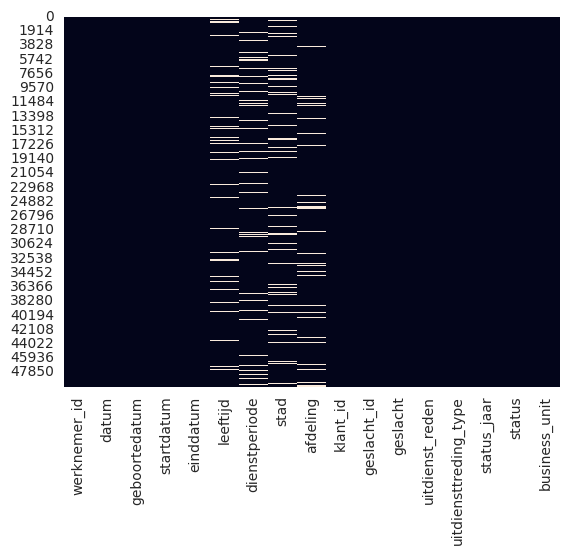

In [76]:
# Show the missing values using an Heatmap
sns.heatmap(start_df.isnull(), cbar=False)
plt.show()

array([[<Axes: title={'center': 'werknemer_id'}>,
        <Axes: title={'center': 'datum'}>,
        <Axes: title={'center': 'startdatum'}>],
       [<Axes: title={'center': 'einddatum'}>,
        <Axes: title={'center': 'leeftijd'}>,
        <Axes: title={'center': 'dienstperiode'}>],
       [<Axes: title={'center': 'klant_id'}>,
        <Axes: title={'center': 'status_jaar'}>, <Axes: >]], dtype=object)

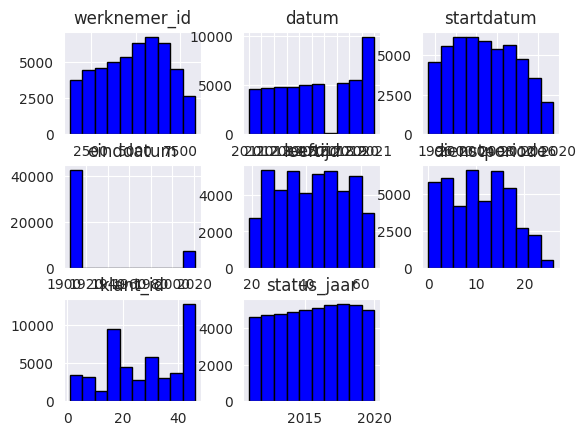

In [77]:
start_df.hist(color='blue', edgecolor='black')

# Data Cleaning

In [78]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49753 entries, 0 to 49752
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   werknemer_id           49753 non-null  int64         
 1   datum                  49753 non-null  datetime64[ns]
 2   geboortedatum          49753 non-null  object        
 3   startdatum             49753 non-null  datetime64[ns]
 4   einddatum              49753 non-null  datetime64[ns]
 5   leeftijd               44653 non-null  float64       
 6   dienstperiode          44802 non-null  float64       
 7   stad                   44210 non-null  object        
 8   afdeling               44688 non-null  object        
 9   klant_id               49753 non-null  int64         
 10  geslacht_id            49753 non-null  object        
 11  geslacht               49753 non-null  object        
 12  uitdienst_reden        49753 non-null  object        
 13  u

In [79]:
# Fill in the missing age
def fill_age(row) -> int:
    if pd.isnull(row['leeftijd']):
        birth_year = pd.to_datetime(row['geboortedatum']).year
        return row['status_jaar'] - birth_year
    else:
        return row['leeftijd']

start_df['leeftijd'] = start_df.apply(fill_age, axis=1)

/tmp/ipykernel_119181/1314465242.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  birth_year = pd.to_datetime(row['geboortedatum']).year


In [80]:
#leeftijd = 64 wordt geen ontslag, maar pensioen
start_df.loc[(start_df['leeftijd'] == 64) & (start_df['uitdienst_reden'] == 'Ontslag'), 'uitdienst_reden'] = 'Pensioen'

In [81]:
# Fill in the missing age
max_udt = start_df['datum'].max()

def fill_lengte_dienst(row):
    if pd.isnull(row['dienstperiode']):
        indiensttreding_date = row['startdatum']
        uitdiensttreding_date = row['einddatum']
        
        if uitdiensttreding_date.year < 1999:
            lengte_dienst = (max_udt - indiensttreding_date).days / 365.25
        else:
            lengte_dienst = (uitdiensttreding_date - indiensttreding_date).days / 365.25
        
        return int(math.ceil(lengte_dienst))
    else:
        return int(row['dienstperiode'])

start_df['dienstperiode'] = start_df.apply(fill_lengte_dienst, axis=1)

In [82]:
start_df.describe()

,werknemer_id,datum,startdatum,einddatum,leeftijd,dienstperiode,klant_id,status_jaar
count,49753.000000,49753,49753,49753,49753.000000,49753.000000,49753.000000,49753.000000
mean,4859.473600,2016-08-06 00:21:52.006914304,2005-09-04 11:13:13.710530176,1921-05-14 09:32:58.201917184,42.077141,10.922598,27.296525,2015.612566
min,1318.000000,2011-01-01 05:06:00,1994-08-28 05:06:00,1905-01-01 05:06:00,19.000000,0.000000,1.000000,2011.000000
25%,3360.000000,2013-12-31 05:06:00,2000-06-01 05:06:00,1905-01-01 05:06:00,31.000000,6.000000,16.000000,2013.000000
50%,5031.000000,2016-12-30 05:06:00,2005-03-31 05:06:00,1905-01-01 05:06:00,42.000000,11.000000,28.000000,2016.000000
75%,6335.000000,2018-12-31 05:06:00,2010-10-13 05:06:00,1905-01-01 05:06:00,53.000000,16.000000,42.000000,2018.000000
max,8336.000000,2020-12-30 05:06:00,2018-12-11 05:06:00,2020-12-29 05:06:00,65.000000,27.000000,46.000000,2020.000000
std,1827.113618,NaN,NaN,NaN,12.430225,6.487367,13.512861,2.845621


In [83]:
missing_data = start_df.isnull().sum()
print(missing_data)

werknemer_id                0
datum                       0
geboortedatum               0
startdatum                  0
einddatum                   0
leeftijd                    0
dienstperiode               0
stad                     5543
afdeling                 5065
klant_id                    0
geslacht_id                 0
geslacht                    0
uitdienst_reden             0
uitdiensttreding_type       0
status_jaar                 0
status                      0
business_unit               0
dtype: int64


In [84]:
# Replace all the NaN values in the column 'stad' with the value 'Overige'
start_df['stad'].fillna('Overige', inplace=True)

# Filter out 'Overige' values into a separate DataFrame
df_overige = start_df[start_df['stad'] == 'Overige'].copy()

# Filter out non-'Overige' values for modeling
start_df = start_df[start_df['stad'] != 'Overige'].copy()

# Check if there are samples in the 'Overige' category for training
# Define features and target variable
features = ['leeftijd', 'status_jaar', 'dienstperiode']
X = start_df[features]
y = start_df['stad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions for the 'Overige' data
X_overige = df_overige[features]
predicted_cities = knn.predict(X_overige)
df_overige['stad'] = predicted_cities

# Concatenate the updated 'Overige' data back to the main DataFrame
start_df = pd.concat([start_df, df_overige], ignore_index=True)

/tmp/ipykernel_119181/4136667614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  start_df['stad'].fillna('Overige', inplace=True)


In [85]:
start_df.describe()

,werknemer_id,datum,startdatum,einddatum,leeftijd,dienstperiode,klant_id,status_jaar
count,49753.000000,49753,49753,49753,49753.000000,49753.000000,49753.000000,49753.000000
mean,4859.473600,2016-08-06 00:21:52.006914048,2005-09-04 11:13:13.710530048,1921-05-14 09:32:58.201917440,42.077141,10.922598,27.296525,2015.612566
min,1318.000000,2011-01-01 05:06:00,1994-08-28 05:06:00,1905-01-01 05:06:00,19.000000,0.000000,1.000000,2011.000000
25%,3360.000000,2013-12-31 05:06:00,2000-06-01 05:06:00,1905-01-01 05:06:00,31.000000,6.000000,16.000000,2013.000000
50%,5031.000000,2016-12-30 05:06:00,2005-03-31 05:06:00,1905-01-01 05:06:00,42.000000,11.000000,28.000000,2016.000000
75%,6335.000000,2018-12-31 05:06:00,2010-10-13 05:06:00,1905-01-01 05:06:00,53.000000,16.000000,42.000000,2018.000000
max,8336.000000,2020-12-30 05:06:00,2018-12-11 05:06:00,2020-12-29 05:06:00,65.000000,27.000000,46.000000,2020.000000
std,1827.113618,NaN,NaN,NaN,12.430225,6.487367,13.512861,2.845621


In [86]:
# Replace all the NaN values in the column 'stad' with the value 'Overige'
start_df['afdeling'].fillna('Overige', inplace=True)

# Filter out 'Overige' values into a separate DataFrame
df_overige = start_df[start_df['afdeling'] == 'Overige'].copy()

# Filter out non-'Overige' values for modeling
start_df = start_df[start_df['afdeling'] != 'Overige'].copy()

# Check if there are samples in the 'Overige' category for training
# Define features and target variable
features = ['leeftijd', 'status_jaar', 'dienstperiode']
X = start_df[features]
y = start_df['afdeling']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions for the 'Overige' data
X_overige = df_overige[features]
predicted_cities = knn.predict(X_overige)
df_overige['afdeling'] = predicted_cities

# Concatenate the updated 'Overige' data back to the main DataFrame
start_df = pd.concat([start_df, df_overige], ignore_index=True)

/tmp/ipykernel_119181/2419353885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  start_df['afdeling'].fillna('Overige', inplace=True)


In [87]:
# Uitdiensttreding_type is gelinkt aan uitdiensttreding_reden, dus die column gaat weg
start_df = start_df.drop('uitdiensttreding_type', axis=1)

In [88]:
# # Calculate the length of the working period
# max_udt = start_df['datum'].max()
# 
# def fill_lengte_dienst(row) -> int:
#     if pd.isnull(row['dienstperiode']):
#         indiensttreding_date = row['startdatum']
#         uitdiensttreding_date = row['einddatum']
#         if uitdiensttreding_date.year < 1999:
#             lengte_dienst = (max_udt - indiensttreding_date).days / 365.25
#         else:
#             lengte_dienst: int = (uitdiensttreding_date - indiensttreding_date).days / 365.25
#         return int(math.ceil(lengte_dienst))
# 
# start_df['dienstperiode'] = start_df.apply(fill_lengte_dienst, axis=1)

In [89]:
#Zorgt ervoor dat column status overeenkomt met uitdiensttrending datum
start_df['status_actief'] = start_df.apply(lambda row: 1 if row['einddatum'].year < 1906 else 0, axis=1)
start_df['status_beëindigd'] = start_df.apply(lambda row: 0 if row['einddatum'].year < 1906 else 1, axis=1)

In [90]:
# Fill in the missing cities with a KNN algoritm

# Visualisatie

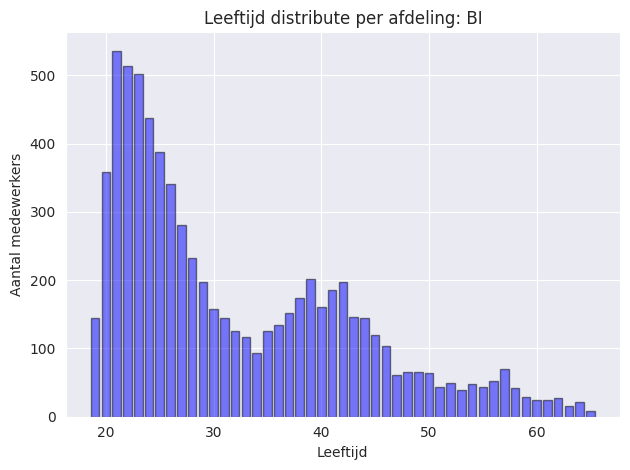

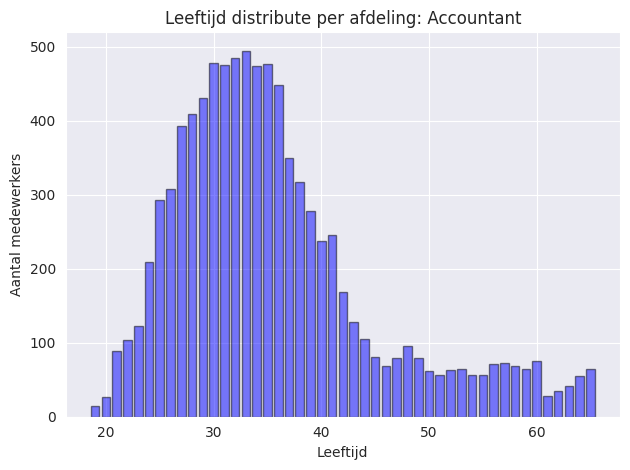

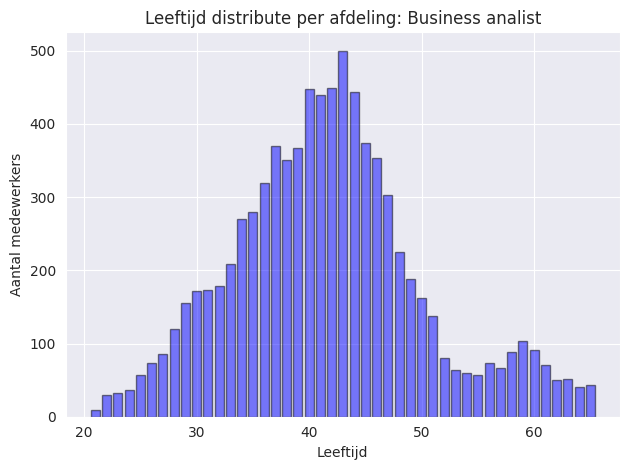

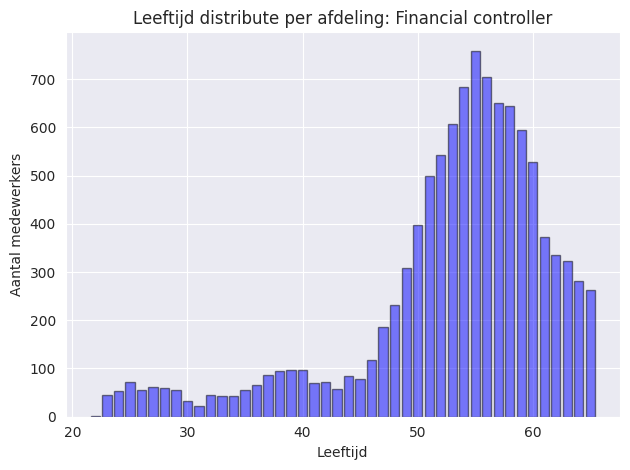

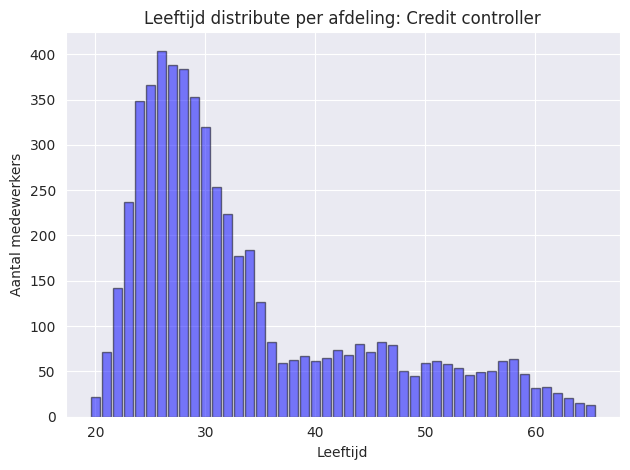

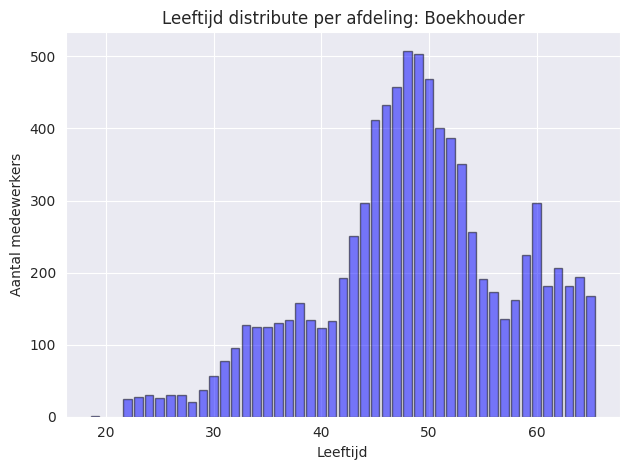

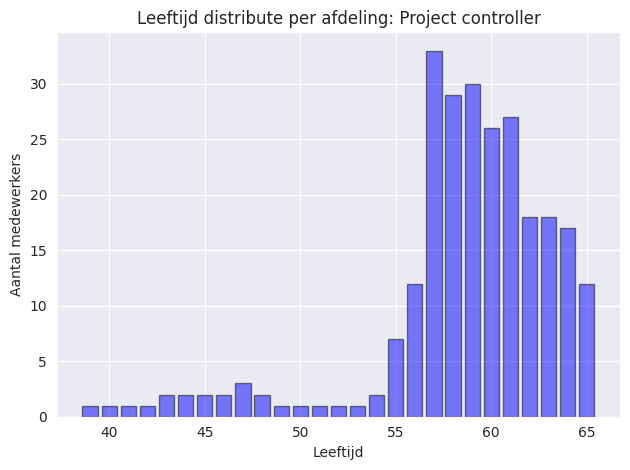

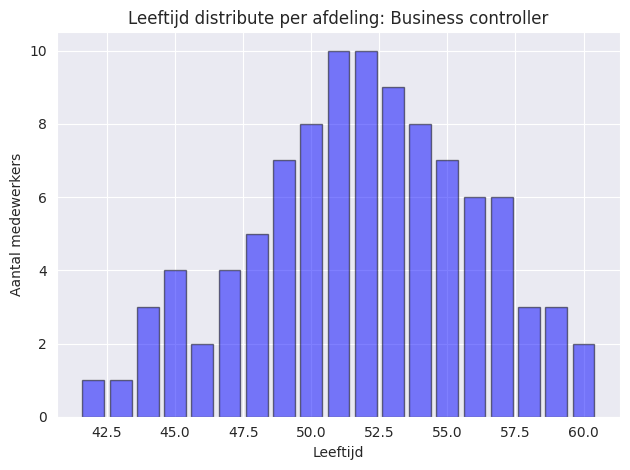

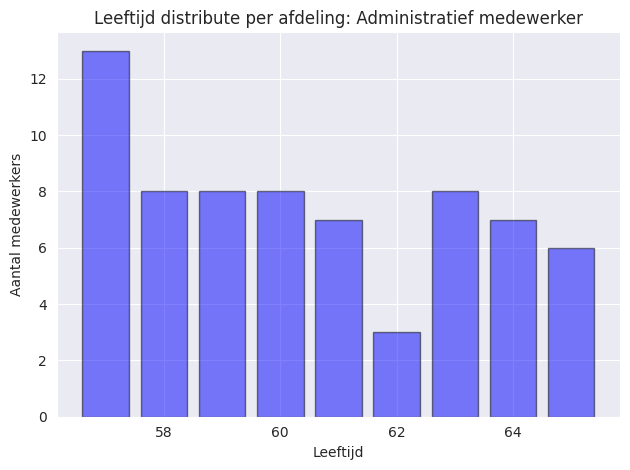

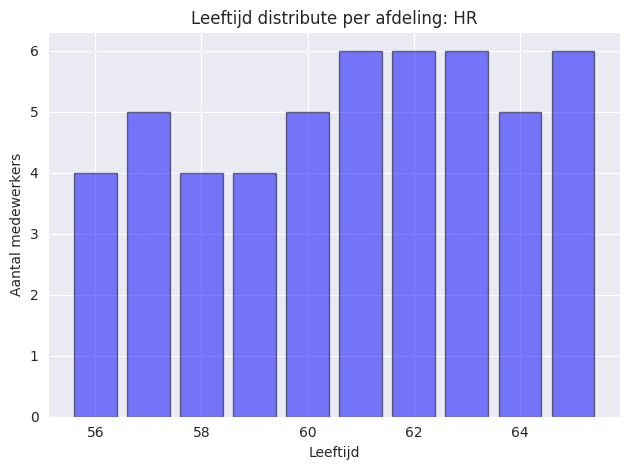

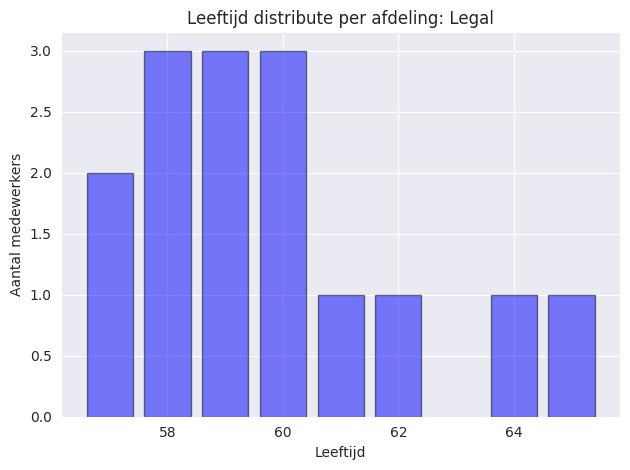

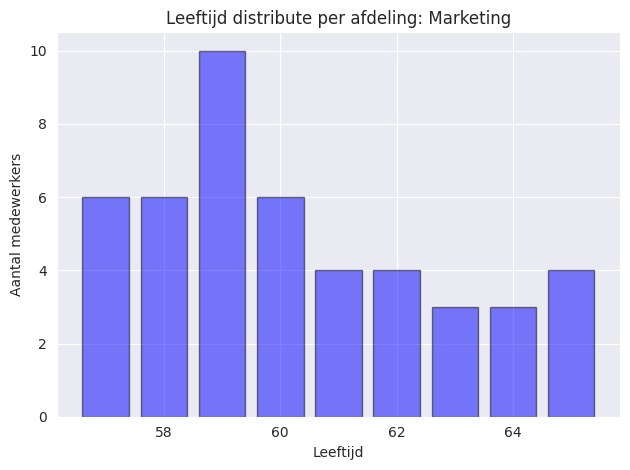

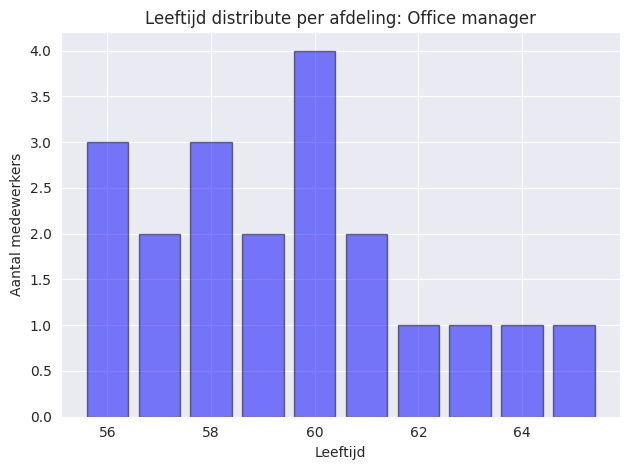

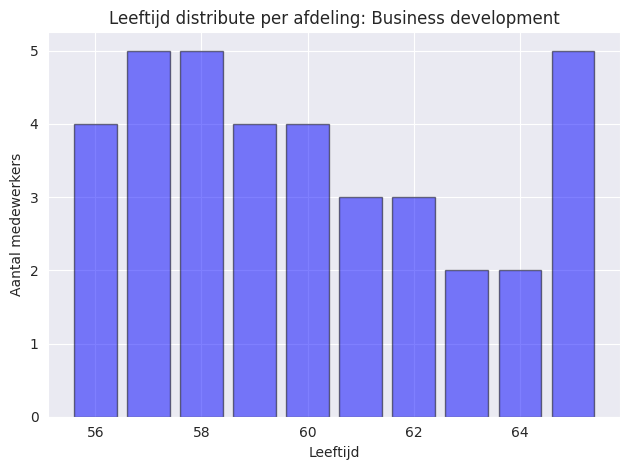

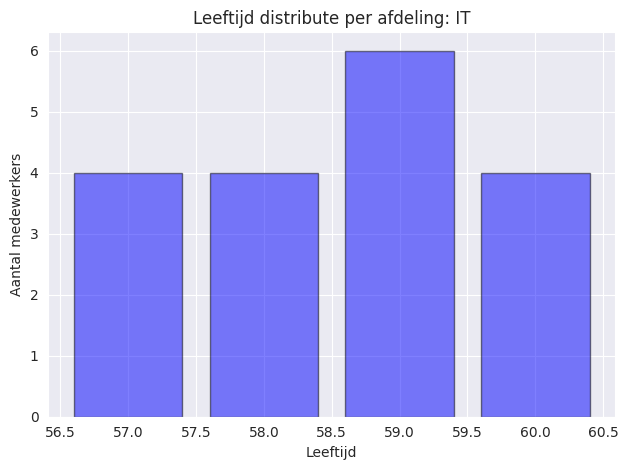

In [91]:
#leeftijd distributie per afdeling
list_of_departments = start_df['afdeling'].unique().tolist()

for department in list_of_departments:
    department_df = start_df[start_df['afdeling'] == department]
    department_age_counts = department_df['leeftijd'].value_counts().sort_index()
    
    plt.bar(department_age_counts.index, department_age_counts.values, color='blue', edgecolor='black', alpha=0.5)
    plt.xlabel('Leeftijd')
    plt.ylabel('Aantal medewerkers')
    plt.title(f'Leeftijd distribute per afdeling: {department}')
    plt.tight_layout()
    plt.show()

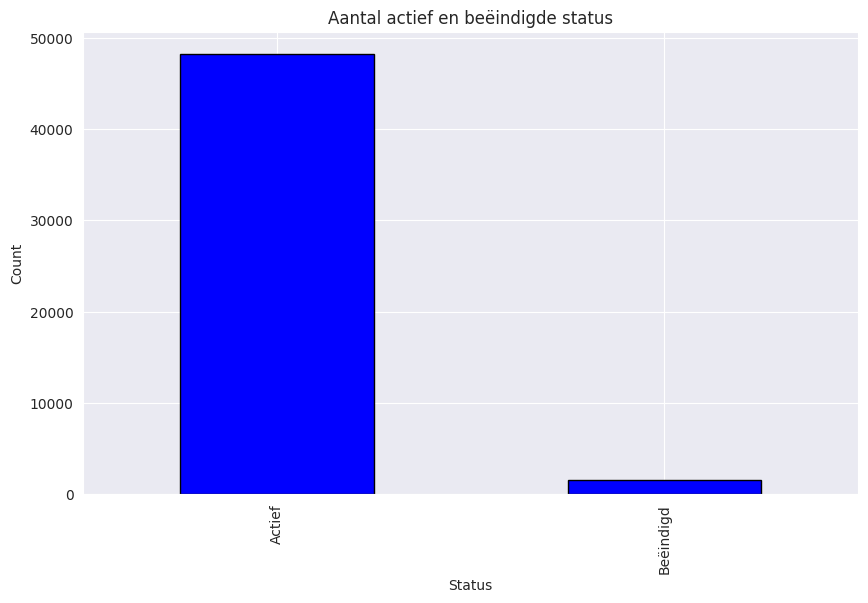

In [92]:
#Aantal actief en aantal beëindigde status
start_stad_counts = start_df['status'].value_counts()
plt.figure(figsize=(10, 6))
start_stad_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Aantal actief en beëindigde status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

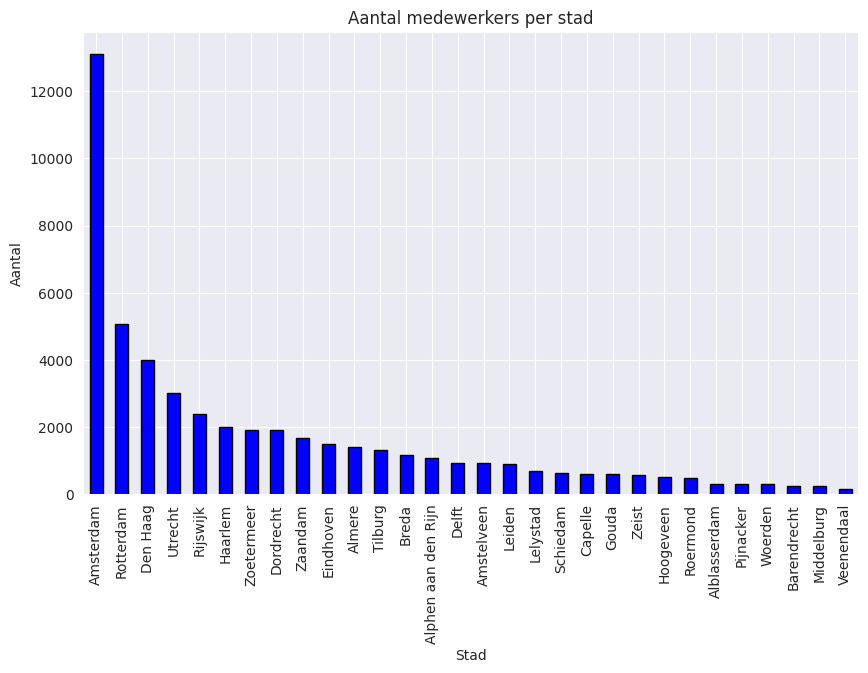

In [93]:
#Histogram aantal medewerkers per stad
start_stad_counts = start_df['stad'].value_counts()
plt.figure(figsize=(10, 6))
start_stad_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Aantal medewerkers per stad')
plt.xlabel('Stad')
plt.ylabel('Aantal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

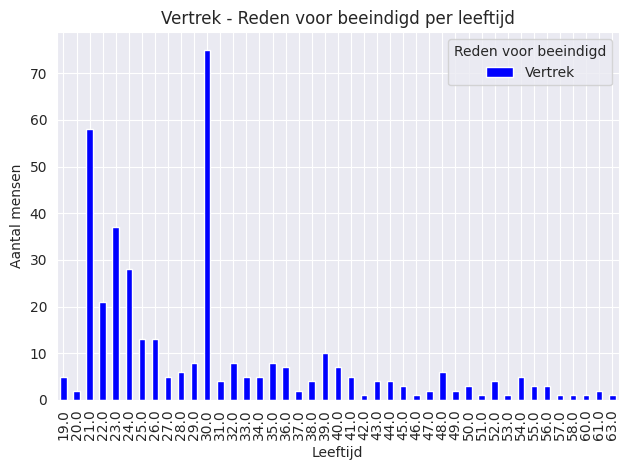

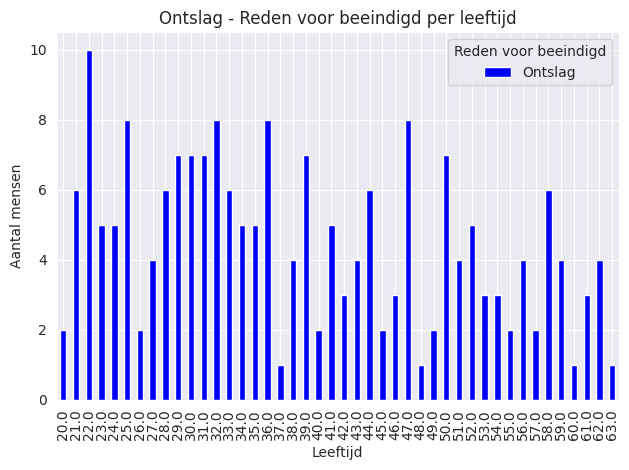

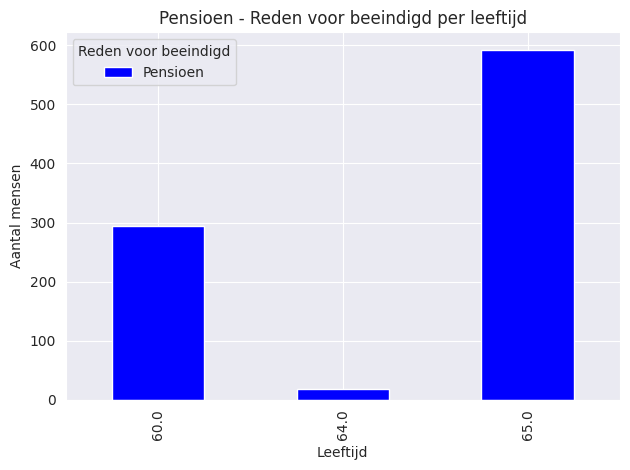

In [94]:

count_df = start_df.groupby(['leeftijd', 'uitdienst_reden']).size().reset_index(name='Count')
unique_reasons = count_df['uitdienst_reden'].unique()

for reason in unique_reasons:
    if reason == 'Niet van toepassing':
        continue
    
    reason_df = count_df[count_df['uitdienst_reden'] == reason]
    pivot_df = reason_df.pivot(index='leeftijd', columns='uitdienst_reden', values='Count').fillna(0)
    pivot_df.plot(kind='bar', stacked=False, color = 'blue')
    plt.xlabel('Leeftijd')
    plt.ylabel('Aantal mensen')
    plt.title(f'{reason} - Reden voor beeindigd per leeftijd')
    plt.legend(title='Reden voor beeindigd')
    plt.tight_layout()
plt.show

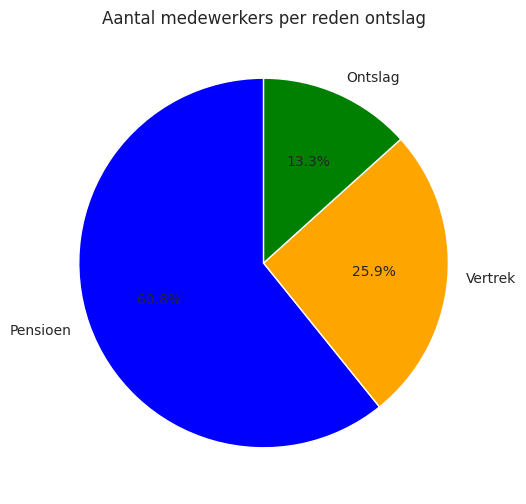

In [95]:
#Pie-chart aantal medewerkers per reden ontslag
pie_start_df = start_df[start_df['uitdienst_reden'] != 'Niet van toepassing']
start_stad_counts = pie_start_df['uitdienst_reden'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(start_stad_counts, labels=start_stad_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red'])
plt.title('Aantal medewerkers per reden ontslag')
plt.show()

# DataFrame without Pensioen
since nothing could be done with pensioen as reason we decided to drop the column

In [96]:
df = start_df[start_df['uitdienst_reden'] != 'Pensioen']

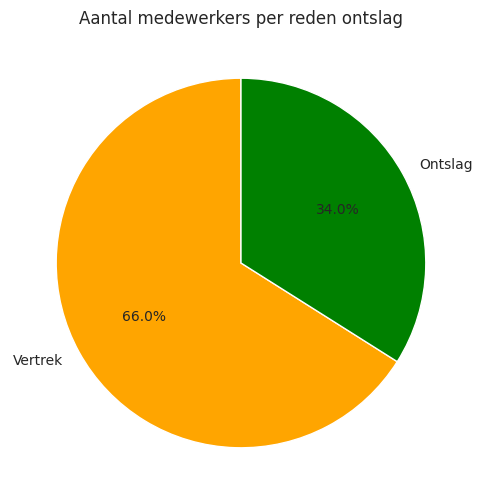

In [97]:
pie_df = df[df['uitdienst_reden'] != 'Niet van toepassing']
stad_counts = pie_df['uitdienst_reden'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(stad_counts, labels=stad_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green'])
plt.title('Aantal medewerkers per reden ontslag')
plt.show()

status                     Actief  Beëindigd  Totaal  Percentage Beëindigd
afdeling                                                                  
Accountant                   8699        118    8817              1.338324
Administratief medewerker      59          1      60              1.666667
BI                           6952        247    7199              3.431032
Boekhouder                   8325         42    8367              0.501972
Business analist             8134         51    8185              0.623091
Business controller            99          0      99              0.000000
Business development           30          0      30              0.000000
Credit controller            5549         68    5617              1.210611
Financial controller        10066         52   10118              0.513936
HR                             45          0      45              0.000000
IT                             14          0      14              0.000000
Legal                    

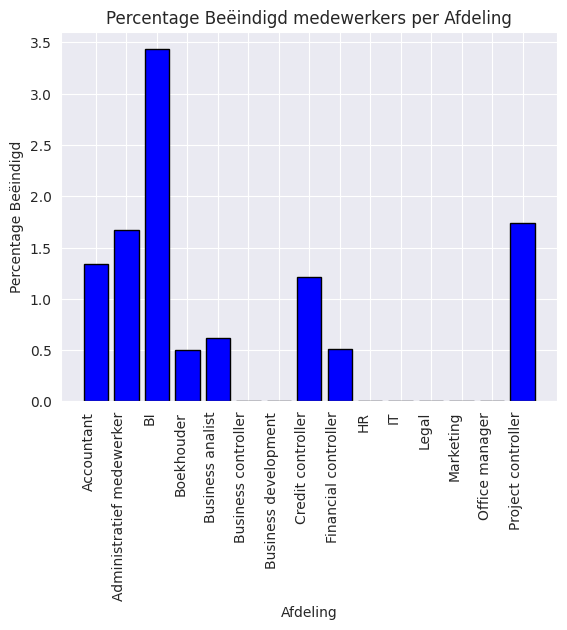

In [98]:
#histogram percentage beeindigde medewerkers per afdeling
aantal_mensen_per_afdeling_status = df.groupby(['afdeling', 'status']).size().unstack(fill_value=0)
aantal_mensen_per_afdeling_status['Totaal'] = aantal_mensen_per_afdeling_status.sum(axis=1)

aantal_mensen_per_afdeling_status['Percentage Beëindigd'] = (
    aantal_mensen_per_afdeling_status['Beëindigd'] / aantal_mensen_per_afdeling_status['Totaal'] * 100
)

print(aantal_mensen_per_afdeling_status)
plt.bar(aantal_mensen_per_afdeling_status.index, aantal_mensen_per_afdeling_status['Percentage Beëindigd'], color='blue', edgecolor='black')
plt.xlabel('Afdeling')
plt.ylabel('Percentage Beëindigd')
plt.title('Percentage Beëindigd medewerkers per Afdeling')
plt.xticks(rotation=90, ha='right')
plt.show()

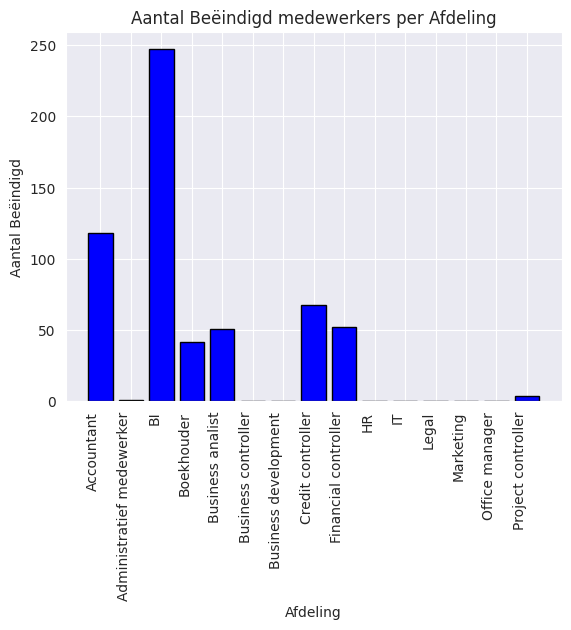

In [99]:
#histogram beeindigde medewerkers per afdeling
plt.bar(aantal_mensen_per_afdeling_status.index, aantal_mensen_per_afdeling_status['Beëindigd'], color='blue', edgecolor='black')
plt.xlabel('Afdeling')
plt.ylabel('Aantal Beëindigd')
plt.title('Aantal Beëindigd medewerkers per Afdeling')
plt.xticks(rotation=90, ha='right')
plt.show()

/tmp/ipykernel_119181/3265821166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dienstperiode'] = pd.to_numeric(df['dienstperiode'], errors='coerce')


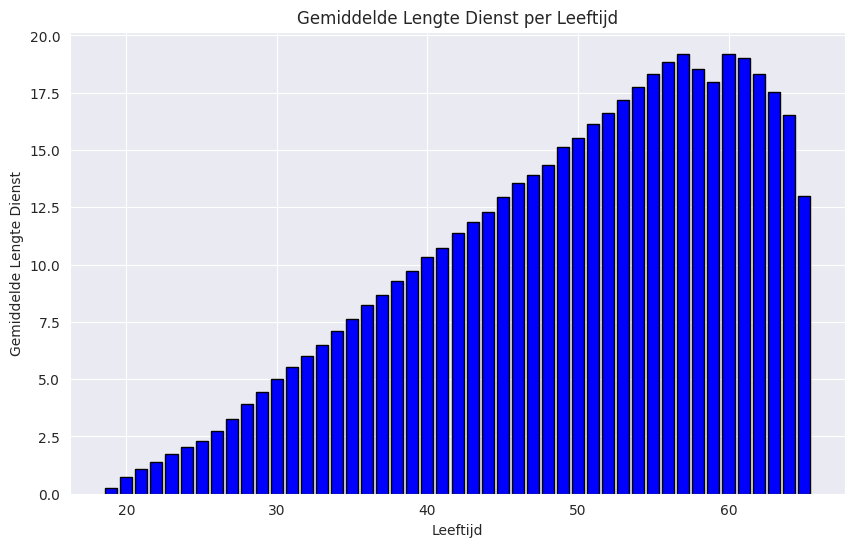

In [100]:
#gemiddelde lengte dienst per leeftijd
df['dienstperiode'] = pd.to_numeric(df['dienstperiode'], errors='coerce')

average_lengte_dienst_per_leeftijd = df.groupby('leeftijd')['dienstperiode'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lengte_dienst_per_leeftijd.index, average_lengte_dienst_per_leeftijd, color='blue', edgecolor='black')

plt.title('Gemiddelde Lengte Dienst per Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Gemiddelde Lengte Dienst')
plt.show()

/tmp/ipykernel_119181/886532007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dienstperiode'] = pd.to_numeric(df['dienstperiode'], errors='coerce')


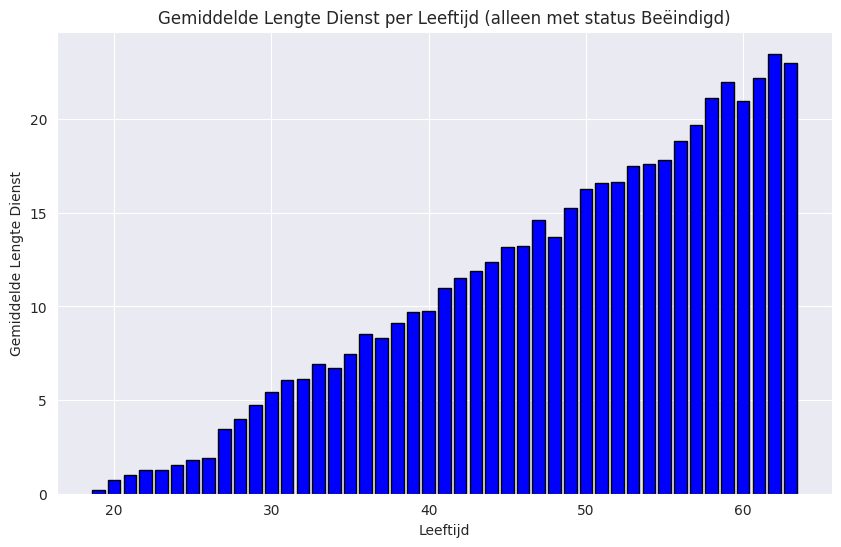

In [101]:
#Gemiddelde Lengte Dienst per Leeftijd (alleen met STATUS Beëindigd)
df['dienstperiode'] = pd.to_numeric(df['dienstperiode'], errors='coerce')
beindigd_data = df[df['status'] == 'Beëindigd']
average_lengte_dienst_per_leeftijd = beindigd_data.groupby('leeftijd')['dienstperiode'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lengte_dienst_per_leeftijd.index, average_lengte_dienst_per_leeftijd, color='blue', edgecolor='black')

plt.title('Gemiddelde Lengte Dienst per Leeftijd (alleen met status Beëindigd)')
plt.xlabel('Leeftijd')
plt.ylabel('Gemiddelde Lengte Dienst')
plt.show()

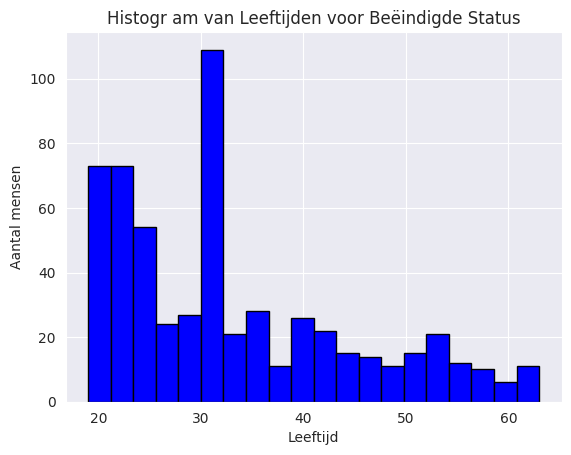

In [102]:
#histogram beeindige status per leeftijd
beeindigd_data = df[df['status'] == 'Beëindigd']
plt.hist(beeindigd_data['leeftijd'], bins=20, color='blue', edgecolor='black')

plt.title('Histogr am van Leeftijden voor Beëindigde Status')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal mensen')
plt.show()

/tmp/ipykernel_119181/3665258222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['leeftijd'] = pd.to_numeric(df['leeftijd'], errors='coerce')


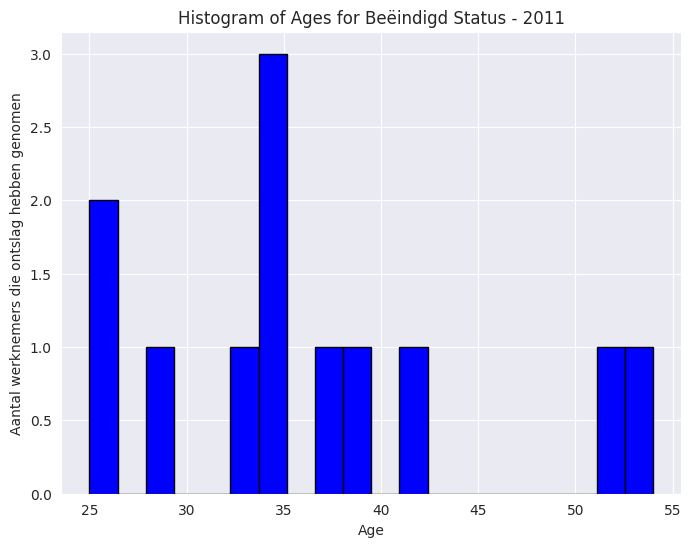

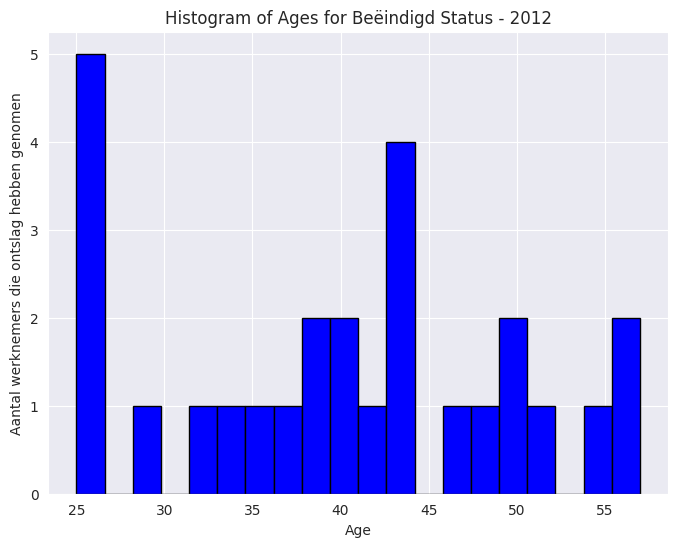

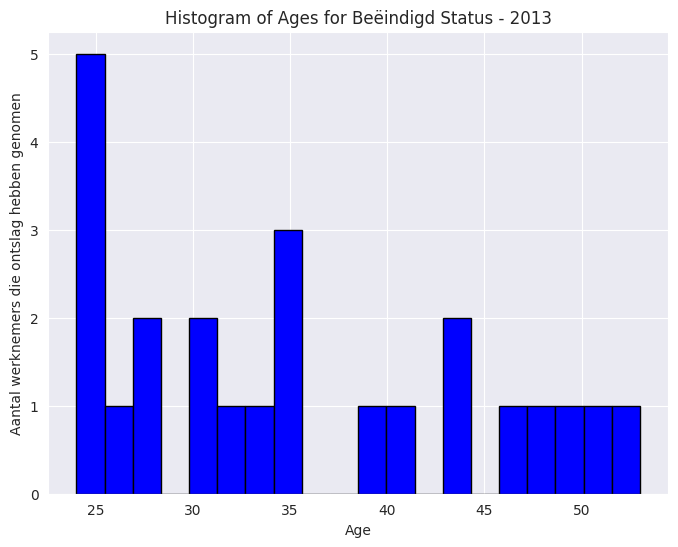

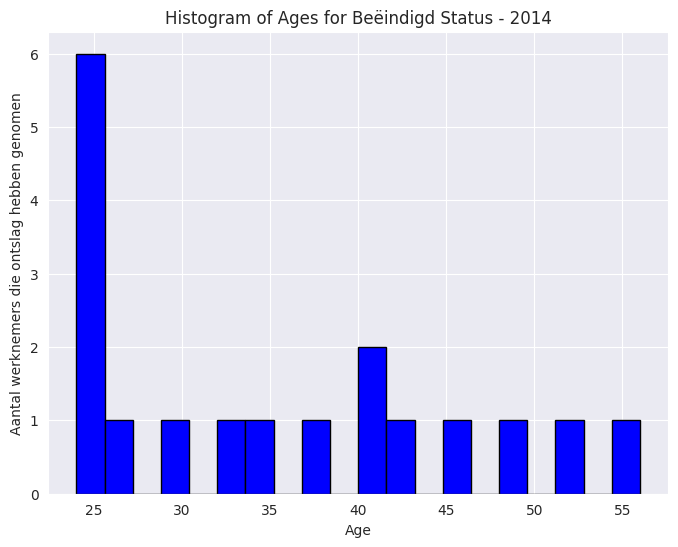

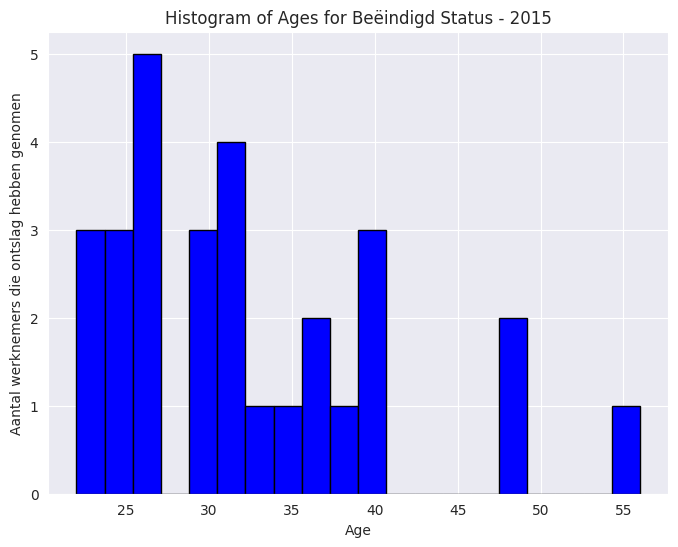

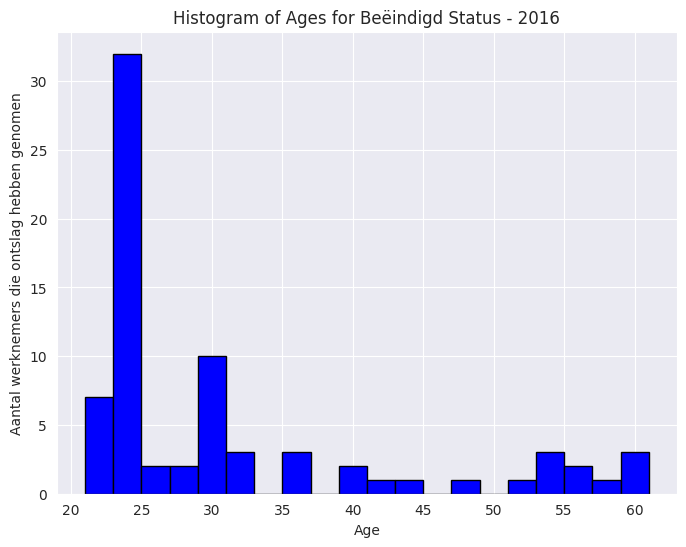

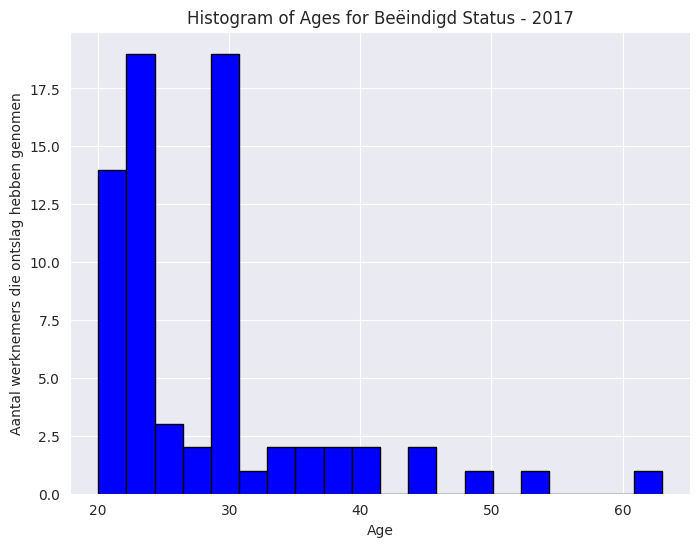

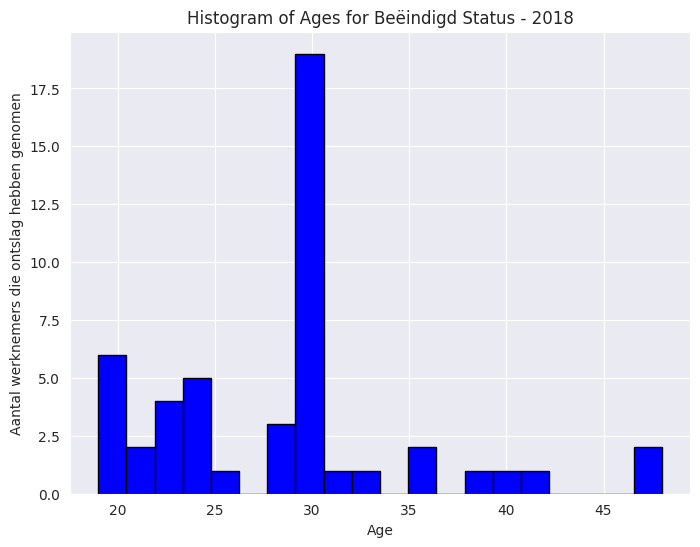

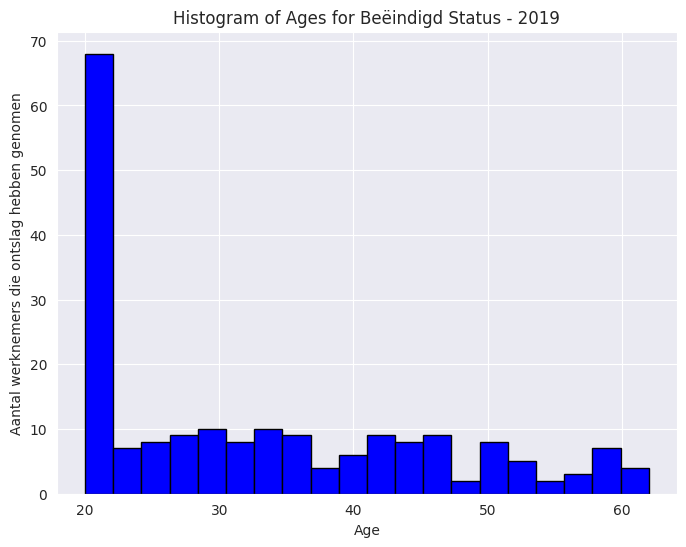

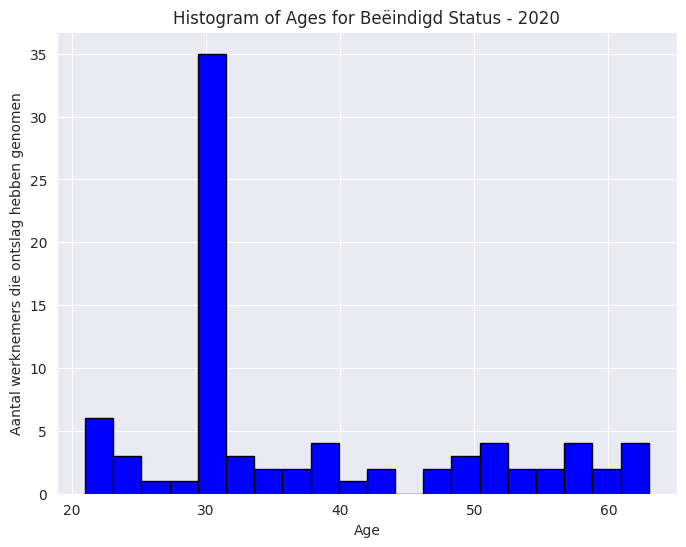

In [103]:
#histogram beeindigd medewerker per leeftijd per jaar
df['leeftijd'] = pd.to_numeric(df['leeftijd'], errors='coerce')
beindigd_data = df[df['status'] == 'Beëindigd']

for year in range(2011, 2021):
    current_year_data = beindigd_data[beindigd_data['datum'].dt.year == year]

    plt.figure(figsize=(8, 6))
    plt.hist(current_year_data['leeftijd'], bins=20, color='blue', edgecolor='black')

    plt.title(f'Histogram of Ages for Beëindigd Status - {year}')
    plt.xlabel('Age')
    plt.ylabel('Aantal werknemers die ontslag hebben genomen')
    plt.show()

In [104]:
#Een nieuwe column waarin staat wat de afstand tot amsterdam is van de steden
coordinates = {
    'Amstelveen': (52.3121, 4.8704),
    'Utrecht': (52.0907, 5.1214),
    'Amsterdam': (52.3676, 4.9041),
    'Den Haag': (52.0705, 4.3007),
    'Leiden': (52.1601, 4.4970),
    'Dordrecht': (51.8133, 4.6901),
    'Barendrecht': (51.8530, 4.5343),
    'Eindhoven': (51.4416, 5.4697),
    'Breda': (51.5719, 4.7683),
    'Tilburg': (51.5555, 5.0913),
    'Rotterdam': (51.9225, 4.4792),
    'Rijswijk': (52.0377, 4.3214),
    'Haarlem': (52.3874, 4.6462),
    'Zaandam': (52.4387, 4.8183),
    'Gouda': (52.0116, 4.7104),
    'Schiedam': (51.9194, 4.3883),
    'Zeist': (52.0907, 5.1804),
    'Middelburg': (51.4988, 3.6100),
    'Almere': (52.3508, 5.2647),
    'Zoetermeer': (52.0571, 4.4936),
    'Veenendaal': (52.0289, 5.5580),
    'Delft': (52.0116, 4.3571),
    'Hoogeveen': (52.7227, 6.4901),
    'Lelystad': (52.5185, 5.4714),
    'Roermond': (51.1942, 5.9871),
    'Alphen aan den Rijn': (52.1277, 4.6575),
    'Capelle': (51.9304, 4.5809),
    'Pijnacker': (52.0153, 4.4255),
    'Alblasserdam': (51.8625, 4.6600),
    'Woerden': (52.0848, 4.8835)
}

def calculate_distance(lat1, lon1, lat2, lon2) -> float:
    R: int = 6371 

    d_lat: float = math.radians(lat2 - lat1)
    d_lon: float = math.radians(lon2 - lon1)

    a: float = math.sin(d_lat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(d_lon / 2) ** 2
    c: float = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance: float = R * c
    return distance

# amsterdam_lat, amsterdam_lon = 52.3676, 4.9041

def calculate_distance_city(city_coordinates):
    distances: list [float] = []
    for index, row in df.iterrows():
        city_name = row['stad']
        if city_name in coordinates:
            city_lat, city_lon = coordinates[city_name]
            distance = calculate_distance(city_coordinates[0], city_coordinates[1], city_lat, city_lon)
            distances.append(distance)
        else:
            distances.append('Onbekend') 
            print(f"Coordinates not found for city: {city_name}") 
    return distances

def get_average_distance() -> list:
    amsterdam = calculate_distance_city(coordinates['Amsterdam'])
    utrecht = calculate_distance_city(coordinates['Utrecht'])
    rotterdam = calculate_distance_city(coordinates['Rotterdam'])
    
    averge_distance = [int(amsterdam[i] + utrecht[i] + rotterdam[i] / 3) for i in range(len(amsterdam))]
    return averge_distance

df['reisafstand'] = get_average_distance()
print(df.head())

   werknemer_id               datum geboortedatum          startdatum  \
0          6962 2018-12-31 05:06:00    26/06/1989 2013-05-23 05:06:00   
1          6212 2016-12-30 05:06:00    25/08/1983 2010-04-24 05:06:00   
2          5325 2018-12-31 05:06:00    24/04/1976 2006-06-09 05:06:00   
3          8193 2018-12-31 05:06:00    26/10/1998 2018-04-28 05:06:00   
4          5926 2013-12-31 05:06:00    19/03/1981 2009-01-09 05:06:00   

            einddatum  leeftijd  dienstperiode        stad    afdeling  \
0 1905-01-01 05:06:00      29.0              5  Amstelveen          BI   
1 1905-01-01 05:06:00      33.0              6     Utrecht  Accountant   
2 1905-01-01 05:06:00      42.0             12   Amsterdam          BI   
3 1905-01-01 05:06:00      20.0              3     Utrecht          BI   
4 1905-01-01 05:06:00      32.0              4    Den Haag  Accountant   

   klant_id geslacht_id geslacht      uitdienst_reden  status_jaar  status  \
0        30           V    Vrouw  Niet

/tmp/ipykernel_119181/4170565277.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reisafstand'] = get_average_distance()


### Saving the dataframe for Feature Engineering

In [105]:
df.to_csv('Datasets/cleaned_data.csv', index=False)